**OUR DATA**

There are  two similar datasets that include passenger information like name, age, gender, socio-economic class, etc. One dataset is titled train.csv and the other is titled test.csv.

Train.csv will contain the details of a subset of the passengers on board (891 to be exact) and importantly, will reveal whether they survived or not, also known as the “ground truth”.

The test.csv dataset contains similar information but does not disclose the “ground truth” for each passenger. It’s  my job to predict these outcomes.

Using the patterns  found  in the train.csv data, we need to predict whether the other 418 passengers on board (found in test.csv) survived.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gender=pd.read_csv('gender_submission.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')


In [3]:
gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [4]:
test.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
gender

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
gender_check=train.loc[:,['Sex','Survived']]
gender_check

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0
...,...,...
886,male,0
887,female,1
888,female,0
889,male,1


In [87]:
survival_rates = gender_check.groupby("Sex").agg('mean')
print(survival_rates)

        Survived
Sex             
female  0.742038
male    0.188908


In [88]:
train[(train['Pclass']==1 )&( train['Survived']==1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
...,...,...,...,...,...,...,...,...,...,...,...,...
862,863,1,1,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",female,48.0,0,0,17466,25.9292,D17,S
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [89]:
train[(train['Pclass']==2 )&( train['Survived']==1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.00,1,2,SC/Paris 2123,41.5792,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
831,832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S
865,866,1,2,"Bystrom, Mrs. (Karolina)",female,42.00,0,0,236852,13.0000,NaN,S
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.00,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.00,1,0,P/PP 3381,24.0000,NaN,C


In [90]:
train[(train['Pclass']==3 )&( train['Survived']==1)]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


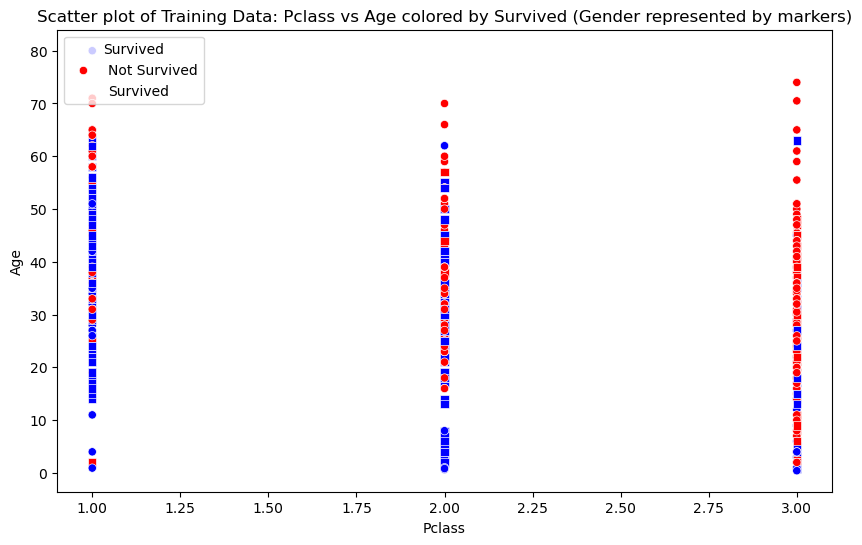

In [92]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Pclass", y="Age", hue="Survived", style="Sex", data=train, palette={0: 'red', 1: 'blue'}, markers=['o', 's'])
plt.xlabel("Pclass")
plt.ylabel("Age")
plt.title("Scatter plot of Training Data: Pclass vs Age colored by Survived (Gender represented by markers)")
plt.legend(title="Survived", labels=["Not Survived", "Survived"], loc="upper left")
plt.show()



The x-axis represents the "Pclass" (Passenger Class).

The y-axis represents the "Age" of the passengers.

The points are colored based on the "Survived" class, where red points represent passengers who did not survive (Survived = 0), and blue points represent passengers who survived (Survived = 1).

We use different markers for "Sex," where 'o' represents males, and 's' represents females.

The scatter plot will visually show how the "Pclass," "Age," and "Sex" features relate to the survival status of passengers.


In [51]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [52]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [53]:
gender.isnull().sum()

PassengerId    0
Survived       0
dtype: int64

In [54]:
train['Age'].median()

28.0

In [55]:
train["Age"].fillna(train["Age"].median(), inplace=True)

In [70]:
test["Age"].fillna(test["Age"].median(), inplace=True)


In [91]:
train["Sex"] = train["Sex"].map({"male": 0, "female": 1})
test["Sex"] = test["Sex"].map({"male": 0, "female": 1})




In [58]:
X_train = train[["Pclass", "Sex", "Age"]].values
y_train = train["Survived"].values
X_test = test[["Pclass", "Sex", "Age"]].values


In [59]:
X_train

array([[ 3.,  0., 22.],
       [ 1.,  1., 38.],
       [ 3.,  1., 26.],
       ...,
       [ 3.,  1., 28.],
       [ 1.,  0., 26.],
       [ 3.,  0., 32.]])

In [75]:
np.zeros(X_train.shape[1])

array([0., 0., 0.])

In [77]:
# g = 1/(1+e^-z)
def sigmoid(z):
  g= 1/(1+np.exp(-z))
  return g



In [78]:
# we used binary cross entropy cost function , Cost = (-1/m) * ∑[ y * log(h) + (1-y) * log(1-h) ]
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(np.dot(X, theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))
    return cost


In [79]:
# gradient descent , theta = theta - derivation of cost function, where gradient is x*(predicted-actual)/observation
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    # costs = []

    for _ in range(iterations):
        h = sigmoid(np.dot(X, theta))
        gradient = np.dot(X.T, (h - y)) / m
        theta -= alpha * gradient
        # cost = (X, y, theta)
        # costs.append(cost)

    return theta 
#, costs

In [72]:
theta = np.zeros(X_train.shape[1])
alpha = 0.01
iterations = 1000
# initial values

In [65]:
theta= gradient_descent(X_train, y_train, theta, alpha, iterations)
#, costs

In [66]:
def predict_passenger_survival(features, theta):
    probability = sigmoid(np.dot(features, theta))
    return (probability >= 0.5).astype(int)


In [67]:
predictions = predict_passenger_survival(X_test, theta)

In [68]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)


In [69]:
accuracy_train = accuracy(y_train, predict_passenger_survival(X_train, theta))
print("Training Accuracy:", accuracy_train)


Training Accuracy: 0.7070707070707071
